**BSP 2024-2025/1**

**Total of 15 marks**

**Names/Neptun Codes:**

**Marks attained for this part of the homework will count towards your final grade.**

**To attain (full) marks for a question, any answer that includes images or a piece of knowledge, which should be referenced/cited, needs to highlight the source (book, article or web address). You are encouraged to help each other, but identical solutions will not be graded.**

**Write your codes to this document for the full marks. Rename the document to: BSP_REP05_NEPTUNCODES_FULL_NAMES**

In [1]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import lfilter
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import tf2zpk


import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.signal import butter, filtfilt


## Task 1
### a) Calculate z-transform (0.5 point)

Take the z-transform of the following 8-point moving average filter and substitute $( z \gets e^{j\omega T} )$.


**Hint:** See lecture 4/2, slides.

$$
y(n) = \frac{1}{8} \sum_{i=0}^{7} x(n-i)
$$

**Answer:**

$Y(z) = 1/8(z^{0} + z^{-1} + z^{-2} + z^{-3} + z^{-4} + z^{-5} + z^{-6} + z^{-7})$

### b) Python routine (1.5 point)

Write your own Python routine from basic commands (i.e., without help from any Python toolbox) to plot the magnitude and phase response of the filter obtained in 1.a). Use normalized frequency \( f \) for the x-axis (i.e., divide by the sampling frequency), and plot in the range $( 0 \leq f \leq 1 )$.

**Hint:** See lecture 4/2. Note that $( \omega = 2\pi f )$. You will need to define \( f \) (with enough elements to get a smooth result), then substitute it into the equations to compute and plot the magnitude and phase response.


In [2]:
# recieve a numpy complex number
#def f(input: complex) -> complex:
#  return input ** 2


#def plot_f(f: Callable):
#  pass

#np.complex(3, 4)

### c) Plot signal (0.5 point)

Download the `complex.mat` file. In the `names` fields, you can check the recorded parameters. Plot the signals on a common plot.

**Hint:** You can use your own function, but remember to correct for the base and gain. Make sure to label axes and use the correct units.

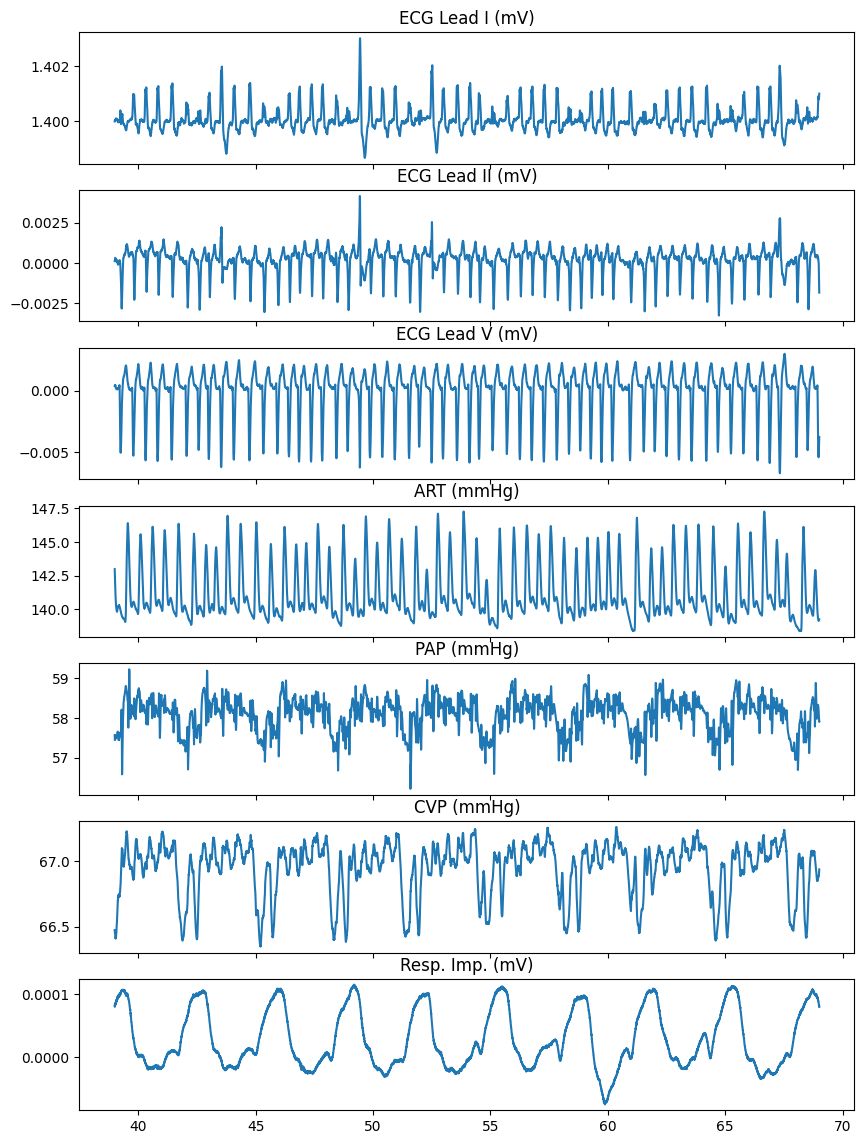

In [3]:
def parse_info(filename: str) -> dict:
    signal_params = {}
    with open(filename) as f:
        text = f.read()
        text = text[text.find("Units\n") + len("Units\n") : text.find("\n\nTo convert")].strip()
    for line in text.split('\n'):
        cells = line.split('\t')
        signal_params[cells[1]] = (float(cells[2]), float(cells[3]), cells[4])
    return signal_params
data = loadmat('complex.mat')
signal_params = parse_info('mgh119m.info')

time = data['Complex_signal'][0, 0]['time'][0]
num_signals = data['Complex_signal'][0, 0][0].shape[1]
fig, axes = plt.subplots(num_signals, 1, figsize=(10, 2 * num_signals), sharex=True)
for i in range(num_signals):
    name = data['Complex_signal'][0][0]['names'][0][i][0]
    values = data['Complex_signal'][0][0]['values'][i]
    gain, base, unit = signal_params[name]
    axes[i].plot(time, (values-base)/gain)
    axes[i].set_title(f'{name} ({unit})')

### d) Filter signal (0.5 point)

Use the filter designed in 1.b) on the central venous pressure (CVP) signal. The signal is provided in the `mgh119m.hea` and `mgh119m.info` files. Plot your result.

**Hint:** You used the `filter(b, a, signal)` function in the previous assignment. Remember what \( b \) and \( a \) are (lecture 4/2, slide 3).

Text(0.5, 1.0, 'CVP (mmHg), filtered with n=100')

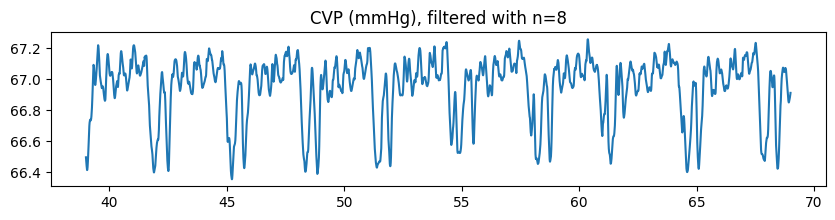

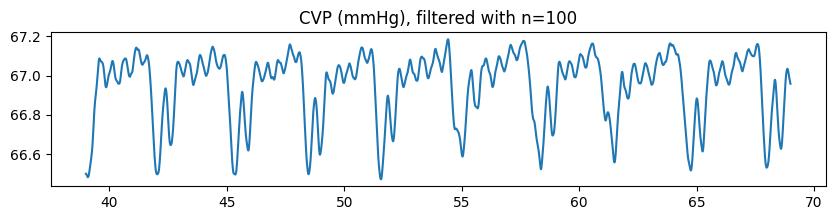

In [4]:
n=8
b = [1/n]*n
a = [1]
i=5
name = data['Complex_signal'][0][0]['names'][0][i][0]
values = data['Complex_signal'][0][0]['values'][i]
gain, base, unit = signal_params[name]
filtered_values = lfilter(b, a, values)
plt.figure(figsize=(10, 2))
plt.plot(time, (filtered_values-base)/gain)
plt.title(f'{name} ({unit}), filtered with n={n}')

n=100
b = [1/n]*n
a = [1]
i=5
name = data['Complex_signal'][0][0]['names'][0][i][0]
values = data['Complex_signal'][0][0]['values'][i]
gain, base, unit = signal_params[name]
filtered_values = lfilter(b, a, values)
plt.figure(figsize=(10, 2))
plt.plot(time, (filtered_values-base)/gain)
plt.title(f'{name} ({unit}), filtered with n={n}')

### e) Filter in physical form (0.5 point)

Write down the underlying difference equation of the filter from Task 1 in the following form:

$$
y(n) + a_1 y(n-1) + \dots + a_k y(n-k) = b_0 x(m) + b_1 x(m-1) + \dots + b_l x(m-l)
$$

**answer:**

$y[n] - \frac{1}{8}y[n-1] - \frac{1}{8}y[n-2] - \frac{1}{8}y[n-3] - \frac{1}{8}y[n-4] - \frac{1}{8}y[n-5] - \frac{1}{8}y[n-6] - \frac{1}{8}y[n-7] = 0$

### f) Signal-flow diagram (0.5 point)

Draw the signal-flow diagram for the realization of the filter (using adders, multipliers, and delay elements).

**Hint:** See an example in lecture 4/2, slide 3.

```
 x(n) ──> [ z^0 ] ──> [ + ] ──> [ × (1/8) ] ──> y(n)
            |         |
            |         |
            |         |
          [ z^-1 ]   |
            |         |
            |         |
            └─> [ z^-1 ] 
            |         |
            |         |
          [ z^-1 ]   |
            |         |
            |         |
            └─> [ z^-1 ] 
            |         |
            |         |
          [ z^-1 ]   |
            |         |
            |         |
            └─> [ z^-1 ] 
            |         |
            |         |
          [ z^-1 ]   |
            |         |
            |         |
            └─> [ z^-1 ] 
            |         |
            |         |
          [ z^-1 ]   |
            |         |
            |         |
            └─> [ z^-1 ] 

```

### g) Pole-zero diagram (0.5 point)

Draw the pole-zero diagram for the filter. Is the system stable? Why or why not? You may use the function `pzmap`, but also show how the pole-zero map is related to the transfer function.

**Hint:** Refer to lecture 4/2, slide 6 for stability, or the previous lecture.

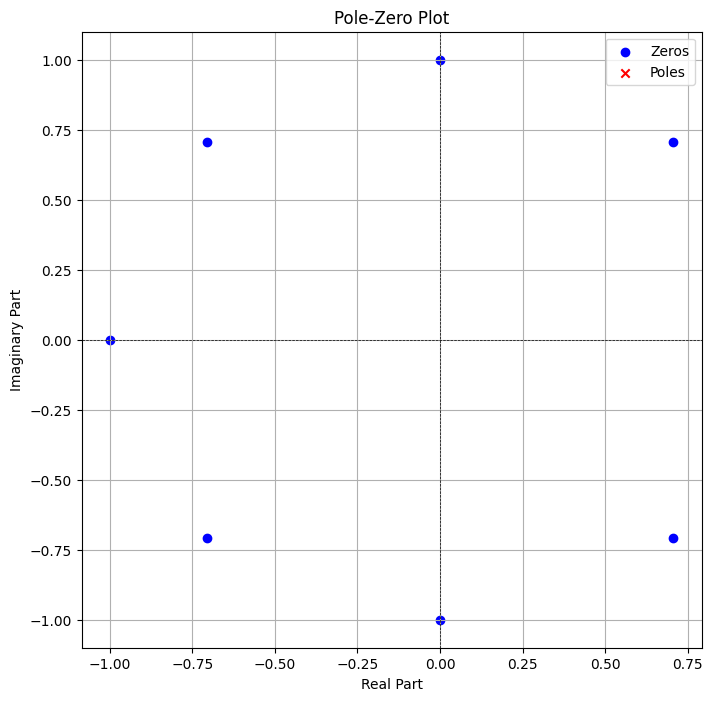

In [5]:
def plot_pole_zero(a, b, title: str = 'Pole-Zero Plot') -> None:
    # Get zeros and poles
    z, p, k = tf2zpk(b, a)

    # Create a pole-zero plot
    plt.figure(figsize=(8, 8))
    plt.scatter(np.real(z), np.imag(z), marker='o', color='blue', label='Zeros')
    plt.scatter(np.real(p), np.imag(p), marker='x', color='red', label='Poles')

    # Add lines for the axes
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')

    # Set limits and labels
    plt.title(title)
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.grid()
    plt.legend()
    plt.show()

# Given filter parameters
n = 8
b = [1/n] * n  # Coefficients of the numerator
a = [1]        # Coefficients of the denominator
plot_pole_zero(a, b)

# the system is stable, because all poles are inside the unit circle

#regarding how the pole-zero map is related to the transfer function
# The pole-zero plot can be obtaiend from the TF, and vice versa
# Also, the frequency response can be determined using the positions of the poles and zeros (zeros can attenuate certain frequencies, while poles can amplify certain frequencies)

### h) Plot ECG Lead II in Time and Frequency Domain (0.5 point)

Take the data from the second ECG lead and plot it in both the time and frequency domains. Answer the following questions:
- What is the bpm (beats per minute)?
- What is the breathing rate?
- What is the frequency of the powerline noise?

**Hint:** Refer to lecture 4/1, slide 4 for more details.


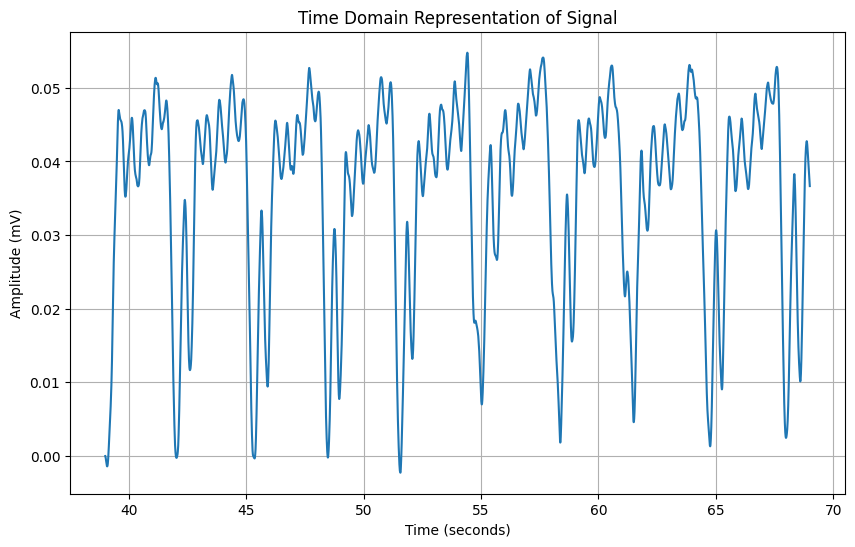

In [6]:
i=1
name = data['Complex_signal'][0][0]['names'][0][i][0]
values = data['Complex_signal'][0][0]['values'][i]
gain, base, unit = signal_params[name]
sampling_frequency=360

# Plot in time domain
plt.figure(figsize=(10, 6))
plt.plot(time, (filtered_values-base)/gain)
plt.title('Time Domain Representation of Signal')
plt.xlabel(f'Time (seconds)')
plt.ylabel(f'Amplitude ({unit})')
plt.grid(True)

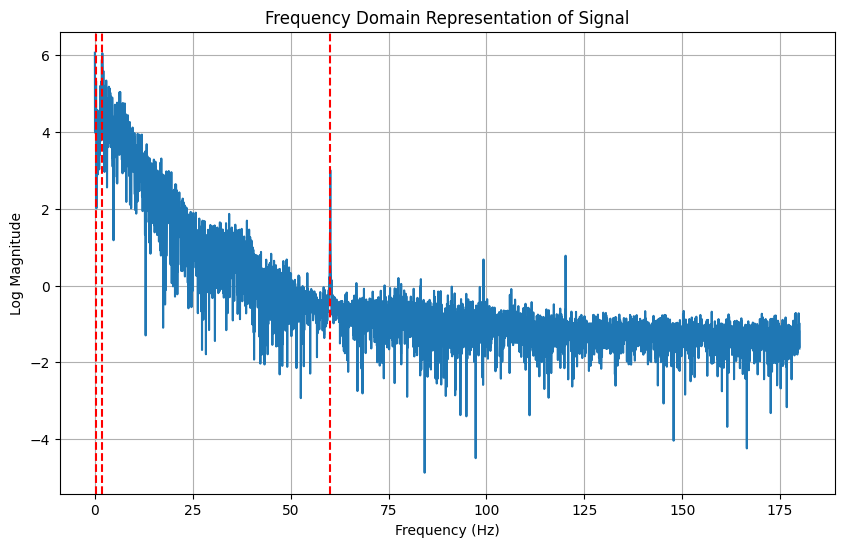

In [7]:
# Plot in frequency domain
n = len(values)
fft_values = np.abs(np.fft.fft(values))
fft_frequencies = np.fft.fftfreq(n, d=1/sampling_frequency)

plt.figure(figsize=(10, 6))
plt.plot(fft_frequencies[:n//2], np.log(fft_values[:n//2]))
plt.title('Frequency Domain Representation of Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Log Magnitude')

plt.axvline(x=18/60, color='red', linestyle='--')
plt.axvline(x=114/60, color='red', linestyle='--')
plt.axvline(x=60, color='red', linestyle='--')

plt.grid(True)

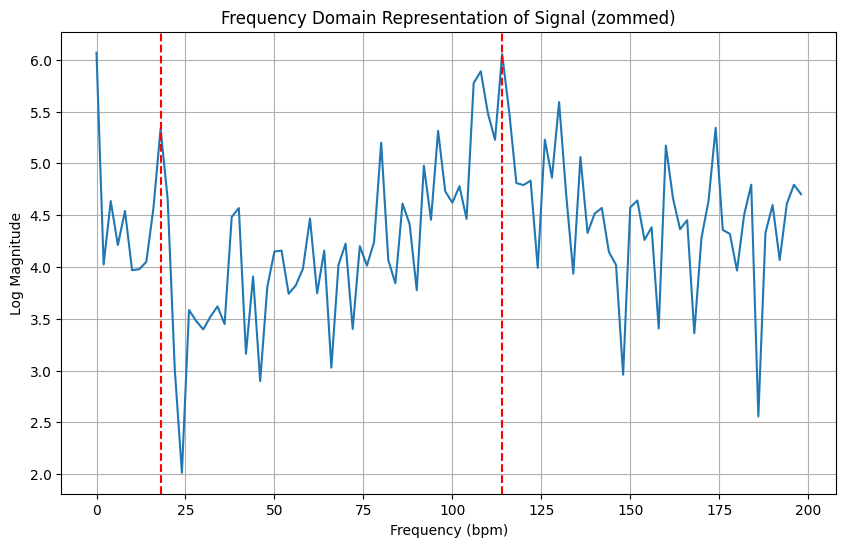

In [8]:
# Plot in frequency domain
n = len(values)
fft_values = np.abs(np.fft.fft(values))
fft_frequencies = np.fft.fftfreq(n, d=1/sampling_frequency)

plt.figure(figsize=(10, 6))
plt.plot(fft_frequencies[:100]*60, np.log(fft_values[:100]))
plt.title('Frequency Domain Representation of Signal (zommed)')
plt.xlabel('Frequency (bpm)')
plt.ylabel('Log Magnitude')
plt.axvline(x=18, color='red', linestyle='--')
plt.axvline(x=114, color='red', linestyle='--')
plt.grid(True)

# What is the bpm (beats per minute)? around 114bpm
#- What is the breathing rate? -> around 18bpm
# What is the frequency of the powerline noise? -> 60Hz

### i) Filter Powerline Noise with a Butterworth Filter (1 point)

Design a Butterworth filter to remove the powerline noise. Check the quality of the filter using `freqz()`. Plot both the filtered signal and its frequency spectrum.

**Hint:** Use the `butter` function to obtain the filter parameters \( b \) and \( a \). If needed, refer to `doc butter` for more details. See lecture 4/3, slide 7 for more information.

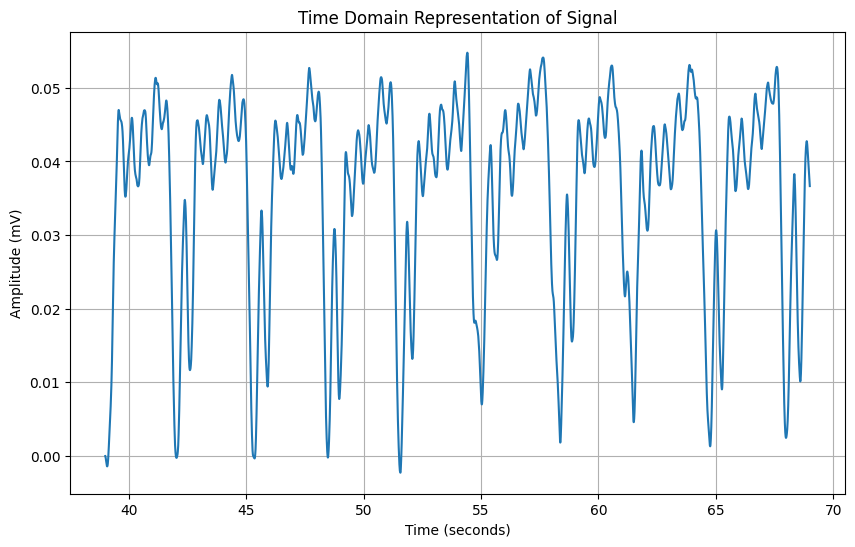

In [9]:
import numpy as np
from scipy.signal import butter

def design_notch_filter(sampling_frequency, target_frequency, quality_factor=30):
    nyquist = 0.5 * sampling_frequency  # Nyquist frequency
    low = (target_frequency - target_frequency / quality_factor) / nyquist
    high = (target_frequency + target_frequency / quality_factor) / nyquist
    
    b, a = butter(N=2, Wn=[low, high], btype='bandstop')
    
    return b, a

b, a = design_notch_filter(sampling_frequency, 60.0)
values_filtered = filtfilt(b, a, values)

# Plot in time domain
plt.figure(figsize=(10, 6))
plt.plot(time, (filtered_values-base)/gain)
plt.title('Time Domain Representation of Signal')
plt.xlabel(f'Time (seconds)')
plt.ylabel(f'Amplitude ({unit})')
plt.grid(True)

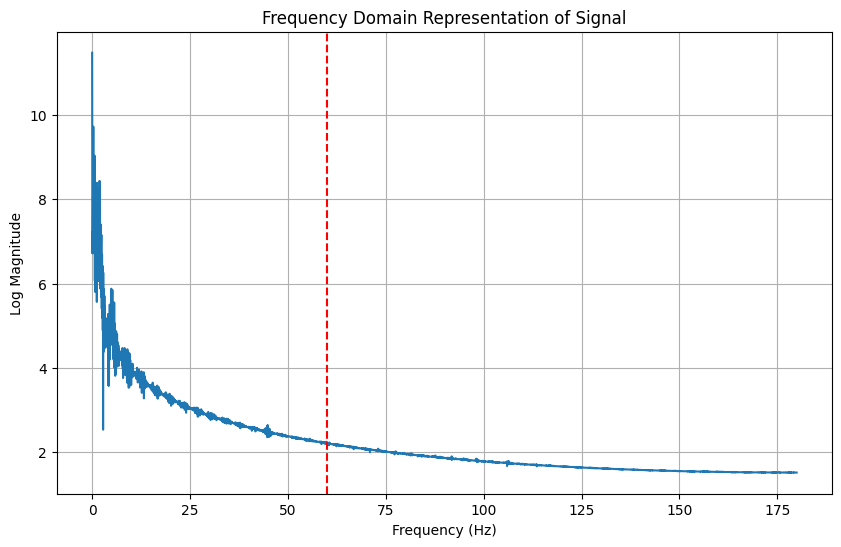

In [10]:
# Plot in frequency domain
n = len(filtered_values)
fft_values = np.abs(np.fft.fft(filtered_values))
fft_frequencies = np.fft.fftfreq(n, d=1/sampling_frequency)

plt.figure(figsize=(10, 6))
plt.plot(fft_frequencies[:n//2], np.log(fft_values[:n//2]))
plt.title('Frequency Domain Representation of Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Log Magnitude')

plt.axvline(x=60, color='red', linestyle='--')

plt.grid(True)

### Task 2 (4 point)

Choose one of the two tasks uploaded to the site. One task involves implementing a Wiener filter, while the other focuses on synchronized averaging. Follow the steps described in the provided `WienerFilter.pdf` and `SynchronizedAveraging.pdf`.

In [11]:
# Answer: see code in notebook "task 2"

### Task 3 (5 point)

Using the pyPPG toolbox’s prefiltering as a reference, design an equivalent FIR filter for systolic peak detection.
1. Apply the designed FIR filter on the example signal provided by the toolbox.
2. Plot the peak detection results for the IIR filter (from the toolbox) and your FIR filter.
3. Generate and compare the Bode diagram and pole-zero (PZ) map for both the IIR and FIR filters.
4. Provide the transfer functions for both the IIR and FIR filters.
5. Based on the plots (Bode diagram, PZ-map, and peak detection results), explain the differences between the IIR and FIR filters in terms of their frequency response, stability, and peak detection accuracy.

In [12]:
# Answer: see code in "main.py"